In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
datos = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [3]:
## amount muestra la cantidad de dinero en cada transacción
datos.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


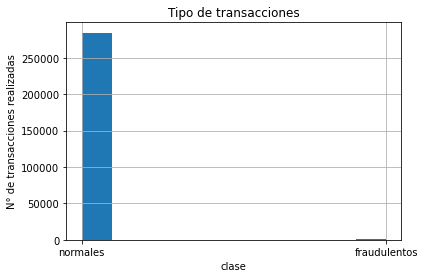

In [4]:
import matplotlib.pyplot as plt

plt.hist(datos["Class"])
plt.grid()
plt.title("Tipo de transacciones")
plt.xticks(range(2), ["normales", "fraudulentos"])
plt.ylabel("N° de transacciones realizadas")
plt.xlabel("clase")
plt.show()
## clase de 0 son transacciones normales 
## clase de 1 son transacciones fraudulentas

Analisis del tiempo en cada transacción

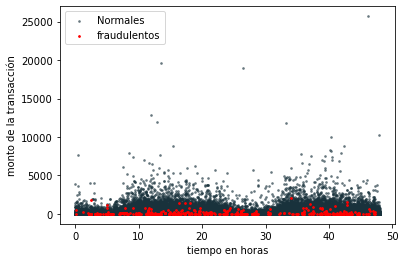

In [5]:
normales = datos[datos["Class"] == 0]
fraudulentos = datos[datos["Class"] == 1]
plt.scatter(normales["Time"]/3600, normales["Amount"], alpha = 0.5,
           c = "#19323C", label = "Normales", s = 3)
plt.scatter(fraudulentos["Time"]/3600, fraudulentos["Amount"], alpha = 1, 
           c = "red", label = "fraudulentos", s = 3)
plt.xlabel("tiempo en horas")
plt.ylabel("monto de la transacción")
plt.legend()

el grafico siguiente mide la cantidad y la distribucion de las transacciones fraudulentas y las normales, y se observa que las transacciones fraudulentas no siguen una regla marcada, es decir, no poseen una distribucion de probabilidad general, y es dificil predecir cuando una transaccion es fraudulenta o no segun el monto de la transacción

Text(0, 0.5, 'Porcentaje de transacción realizadas %')

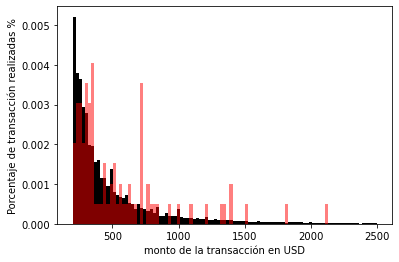

In [6]:
bins = np.linspace(200, 2500, 100)
plt.hist(normales.Amount, bins, alpha = 1, cumulative = False, density = True,
         label = "Normales", color = "black")
plt.hist(fraudulentos.Amount, bins, alpha = 0.5, density = True,
        label = "fraudulentos", color = "red")
plt.xlabel("monto de la transacción en USD")
plt.ylabel("Porcentaje de transacción realizadas %")